# 크롤링하여 스마트 스토어 분석하기

### 네이버_쇼핑_크롤링(인프런 강의 참고)

1. 스토어찜 수별로 데이터 시각화 해보기
2. 빅파워, 파워가 붙은 스토어 찜 수 시각해 해보기

In [23]:
# 네이버 열기
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import csv

browser = webdriver.Chrome('C:\chromedriver.exe') # 브라우저 생성
browser.get('https://www.naver.com') # 웹사이트 열기
browser.implicitly_wait(10) # 로딩이 끝날떄까지 10초까지는 기다려줌 

# 쇼핑 메뉴 클릭하기
# <a href="https://shopping.naver.com/" class="nav shop" data-clk="svc.shopping"><span class="blind">쇼핑</span></a>
browser.find_element_by_css_selector('a.nav.shop').click()
time.sleep(2)

# 몰 전체보기 누르기
browser.find_element_by_css_selector('a.co_mall').click()
time.sleep(2)

# 스마트 스토어 누르기
browser.find_element_by_css_selector('circle').click()
time.sleep(2)

# 검색창 클릭
search = browser.find_element_by_css_selector('input.mallFilter_input_search__2WrTv')
search.click()

# 검색어로 다꾸를 입력하고 검색하기
search.send_keys('다꾸') 
search.send_keys(Keys.ENTER)
# 스크롤 전 높이
before_h = browser.execute_script("return window.scrollY")

# 무한 스크롤
while True:
    # 맨 아래로 스크롤을 내린다.
    browser.find_element_by_css_selector("body").send_keys(Keys.END)
    
    # 스크롤 사이 페이지 로딩 시간
    time.sleep(2)
    
    # 스크롤 후 높이
    after_h = browser.execute_script("return window.scrollY")
    
    if after_h == before_h:
        break;
    before_h = after_h
    
#---------------------------------------------------------------------------------------------#
# 파일생성
f = open(r"C:\Users\user\jupyter\data2.csv", 'w', encoding='cp949', newline='') # 쓰기모드
f.write('상점이름, 구독자수, 파워유무, 상품개수\n')

csvWriter = csv.writer(f)
    
# 상품정보 div 큰 박스
items = browser.find_elements_by_css_selector(".mallListItem_main_info__3H9xh")
for item in items:
    
    name = item.find_element_by_css_selector(".mallListItem_title__3sJnY").text # 타이틀(쇼핑몰 이름)
    
    try:
        power = item.find_elements_by_css_selector(".mallListItem_cell__3BvGd")[0].text # 파워,빅파워 유무
        count = item.find_elements_by_css_selector(".mallListItem_cell__3BvGd")[3].text # 상품 개수
    except:
        power = "none"
        
    if power == "파워" or power == "빅파워":
        # 파워나 빅파워가 있으면 2번째 span을 가져와야 한다.
        subscribe = item.find_elements_by_css_selector(".mallListItem_etc__3Dpg_ > span")[1].text # 스토어찜수
    else:
        # 파워나 빅파워가 없을 경우에는 1번째 span을 가져와야한다.
        subscribe = item.find_elements_by_css_selector(".mallListItem_etc__3Dpg_ > span")[0].text # 스토어찜수

    print(name, subscribe, power, count) # 스토어이름, 스토어찜 수, 파워유무, 상품개수
    # 데이터 쓰기
    csvWriter.writerow([name, subscribe, power, count]) # 스토어이름, 스토어찜 수, 파워유무, 상품개수

# 파일 닫기
f.close()

C:\Users\user\AppData\Local\Temp/ipykernel_6532/1526084628.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome('C:\chromedriver.exe') # 브라우저 생성
C:\Users\user\AppData\Local\Temp/ipykernel_6532/1526084628.py:13: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  browser.find_element_by_css_selector('a.nav.shop').click()
C:\Users\user\AppData\Local\Temp/ipykernel_6532/1526084628.py:17: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  browser.find_element_by_css_selector('a.co_mall').click()
C:\Users\user\AppData\Local\Temp/ipykernel_6532/1526084628.py:21: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  browser.find_element_by_css_selector('circle').click()


모챠모챠 스토어찜 11,882 빅파워 상품개수 1,627
두근두근문구점 스토어찜 19,918 빅파워 상품개수 9,079
일리상점 스토어찜 9,571 빅파워 상품개수 5,365
핑크무라 스토어찜 8,108 파워 상품개수 1,194
봄나비상점 스토어찜 1,222 파워 상품개수 975
언니네 잡화점. 스토어찜 21 none 상품개수 975
cherish-mg 스토어찜 3,675 파워 상품개수 842
달페이퍼 스토어찜 7,840 빅파워 상품개수 6,013
워리문구점 스토어찜 498 파워 상품개수 575
허니 마켓 스토어찜 1,304 파워 상품개수 789
줄리엣의 편지 스토어찜 7,140 빅파워 상품개수 427
체리벨 스토어찜 26,119 빅파워 상품개수 917
다꾸랭킹 스토어찜 5,074 파워 상품개수 1,771
로맨틱핑크 스토어찜 1,569 파워 상품개수 3,744
AROJIN 스토어찜 13,625 파워 상품개수 107
DANNISHOP 스토어찜 7,859 빅파워 상품개수 41
마켓피치 스토어찜 8,558 파워 상품개수 732
멜리멜로 melimelo 스토어찜 5,303 빅파워 상품개수 2,298
뽀뽀상점 스토어찜 7,671 파워 상품개수 516
루카랩 스토어찜 35,254 빅파워 상품개수 472
HARI MARKET 스토어찜 3,585 파워 상품개수 56
리라트 스토어찜 13,899 파워 상품개수 53
몽몽문구점 스토어찜 382 none 상품개수 53
스꾸다꾸 스토어찜 525 none 상품개수 53
콩콩콩문구 스토어찜 760 파워 상품개수 354
민톤샵 스토어찜 1,282 파워 상품개수 203
다꾸앙 스토어찜 1,929 none 상품개수 203
키베문구점 스토어찜 1,272 파워 상품개수 202
다꾸리마켓 스토어찜 19 none 상품개수 202
리니문구점 스토어찜 213 none 상품개수 202
오즈도로시 스토어찜 464 none 상품개수 202
엘라의일기 스토어찜 4,915 파워 상품개수 285
귤님 스토어찜 1,136 none 상품개수 285
클레비 스토어찜 

# 데이터 로드

In [46]:
# 라이브러리 로드하기
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

In [47]:
# 한글폰트 설정
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False)

In [48]:
# 선명하게 설정
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

C:\Users\user\AppData\Local\Temp/ipykernel_6532/1336414531.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


In [49]:
# 파일 로드
df = pd.read_csv("Data/data3.csv",encoding="cp949")
df.head()

,상점이름,구독자수,파워유무,상품개수
0,모챠모챠,"스토어찜 11,882",빅파워,"상품개수 1,627"
1,두근두근문구점,"스토어찜 19,918",빅파워,"상품개수 9,079"
2,일리상점,"스토어찜 9,571",빅파워,"상품개수 5,365"
3,핑크무라,"스토어찜 8,108",파워,"상품개수 1,194"
4,봄나비상점,"스토어찜 1,222",파워,상품개수 975


In [50]:
df.shape

(252, 4)

# 데이터 전처리

In [51]:
# 컬럼이름 바꾸기
df.columns=["상점이름","구독수","파워유무","상품개수"]
df.head()

,상점이름,구독수,파워유무,상품개수
0,모챠모챠,"스토어찜 11,882",빅파워,"상품개수 1,627"
1,두근두근문구점,"스토어찜 19,918",빅파워,"상품개수 9,079"
2,일리상점,"스토어찜 9,571",빅파워,"상품개수 5,365"
3,핑크무라,"스토어찜 8,108",파워,"상품개수 1,194"
4,봄나비상점,"스토어찜 1,222",파워,상품개수 975


In [52]:
df_sub_count = df[["상점이름","구독수"]]
df_sub_count

,상점이름,구독수
0,모챠모챠,"스토어찜 11,882"
1,두근두근문구점,"스토어찜 19,918"
2,일리상점,"스토어찜 9,571"
3,핑크무라,"스토어찜 8,108"
4,봄나비상점,"스토어찜 1,222"
...,...,...
247,땡땡 상점,스토어찜 3
248,코로롱스튜디오,스토어찜 1
249,아재헤이즐 문방구,스토어찜 24
250,studio ean,스토어찜 10


In [53]:
# 스토어찜이 있는 스토어만 모아서 보기
df_sub = df_sub_count.loc[df["구독수"].str.contains("스토어")].copy()
df_sub.head()

,상점이름,구독수
0,모챠모챠,"스토어찜 11,882"
1,두근두근문구점,"스토어찜 19,918"
2,일리상점,"스토어찜 9,571"
3,핑크무라,"스토어찜 8,108"
4,봄나비상점,"스토어찜 1,222"


In [54]:
# 스토어찜 없애고 숫자만 남기기
df_sub[["구독수"]]

,구독수
0,"스토어찜 11,882"
1,"스토어찜 19,918"
2,"스토어찜 9,571"
3,"스토어찜 8,108"
4,"스토어찜 1,222"
...,...
247,스토어찜 3
248,스토어찜 1
249,스토어찜 24
250,스토어찜 10


In [125]:
def parse_num(data):
    num = data.split("찜")[-1] # 뒤에 있는 숫자 가져오기
    num = num.replace(' ', '') # 공백 없애기
    num = num.replace(',', '') # 컴마 없애기
    # int(year) # 숫자로 변경 

    num = int(num)
    return num
y = parse_num(data)
print(type(y))
y

NameError: name 'data' is not defined

In [56]:
# 구독자수 컬럼 새로 만들어서 숫자로 변경해주기
df_sub["구독자수"] = df_sub["구독수"].apply(parse_num)
df_sub

,상점이름,구독수,구독자수
0,모챠모챠,"스토어찜 11,882",11882
1,두근두근문구점,"스토어찜 19,918",19918
2,일리상점,"스토어찜 9,571",9571
3,핑크무라,"스토어찜 8,108",8108
4,봄나비상점,"스토어찜 1,222",1222
...,...,...,...
247,땡땡 상점,스토어찜 3,3
248,코로롱스튜디오,스토어찜 1,1
249,아재헤이즐 문방구,스토어찜 24,24
250,studio ean,스토어찜 10,10


In [57]:
# 구독수 컬럼 삭제
df_sub = df_sub.drop("구독수",axis=1)
df_sub.head()

,상점이름,구독자수
0,모챠모챠,11882
1,두근두근문구점,19918
2,일리상점,9571
3,핑크무라,8108
4,봄나비상점,1222


In [58]:
# 242개에서 237개만 스토어 찜수가 있다.
df_sub.shape

(237, 2)

In [115]:
# 100미만인 것만 출력
# 100이상 500미만
# 500이상 1000미만
# 1000이상

#20미만
df_sub_twenty = df_sub[df_sub["구독자수"]<20] # 94개
# 20이상 50미만
df_sub_fifty = df_sub[(df_sub["구독자수"]>=20) & (df_sub["구독자수"]<50)] # 31개
# 50이상 100개 미만
df_sub_fifty_up = df_sub[(df_sub["구독자수"]>=50) & (df_sub["구독자수"]<100)] # 22개
# 100이상 500미만
df_sub_hundred = df_sub[(df_sub["구독자수"]>=100) & (df_sub["구독자수"]<500)] # 40개 
# 500이상 1000미만
df_sub_five_hundred = df_sub[(df_sub["구독자수"]>=500) & (df_sub["구독자수"]<1000)] # 10개
# 1000이상
df_sub_thousand = df_sub[df_sub["구독자수"]>=1000] # 40개


In [78]:
df_sub_twenty.head()

,상점이름,구독자수
28,다꾸리마켓,19
58,힐링문구,7
62,쿠리제작소,14
68,페이퍼앤디,9
78,호앤호유 문구점,4


In [93]:
# 50미만인 것
df_sub_fifty.head()

,상점이름,구독자수
5,언니네 잡화점.,21
48,페이퍼플랜,20
52,라임 마켓,35
72,꼼뭉문구점,20
80,행복한꾸미기,31


In [91]:
# 50이상 100개 미만
df_sub_fifty_up.head()

,상점이름,구독자수
34,핑퐁데이,78
36,설렘문방구,81
45,슬꾸다꾸,52
46,하비투유 - 취미를 너에게,94
49,헬캣의 다꾸상자,69


In [67]:
# 100이상 500미만
df_sub_hundred.head()

,상점이름,구독자수
8,워리문구점,498
22,몽몽문구점,382
29,리니문구점,213
30,오즈도로시,464
35,별송이 다꾸다꾸,233


In [68]:
# 500이상 1000미만
df_sub_five_hundred.head()

,상점이름,구독자수
23,스꾸다꾸,525
24,콩콩콩문구,760
55,WishToGo,922
65,다꾸어,643
70,펑키슈가,658


In [69]:
# 1000이상
df_sub_thousand.head()

,상점이름,구독자수
0,모챠모챠,11882
1,두근두근문구점,19918
2,일리상점,9571
3,핑크무라,8108
4,봄나비상점,1222


# 시각화 하기

<AxesSubplot:xlabel='상점이름'>

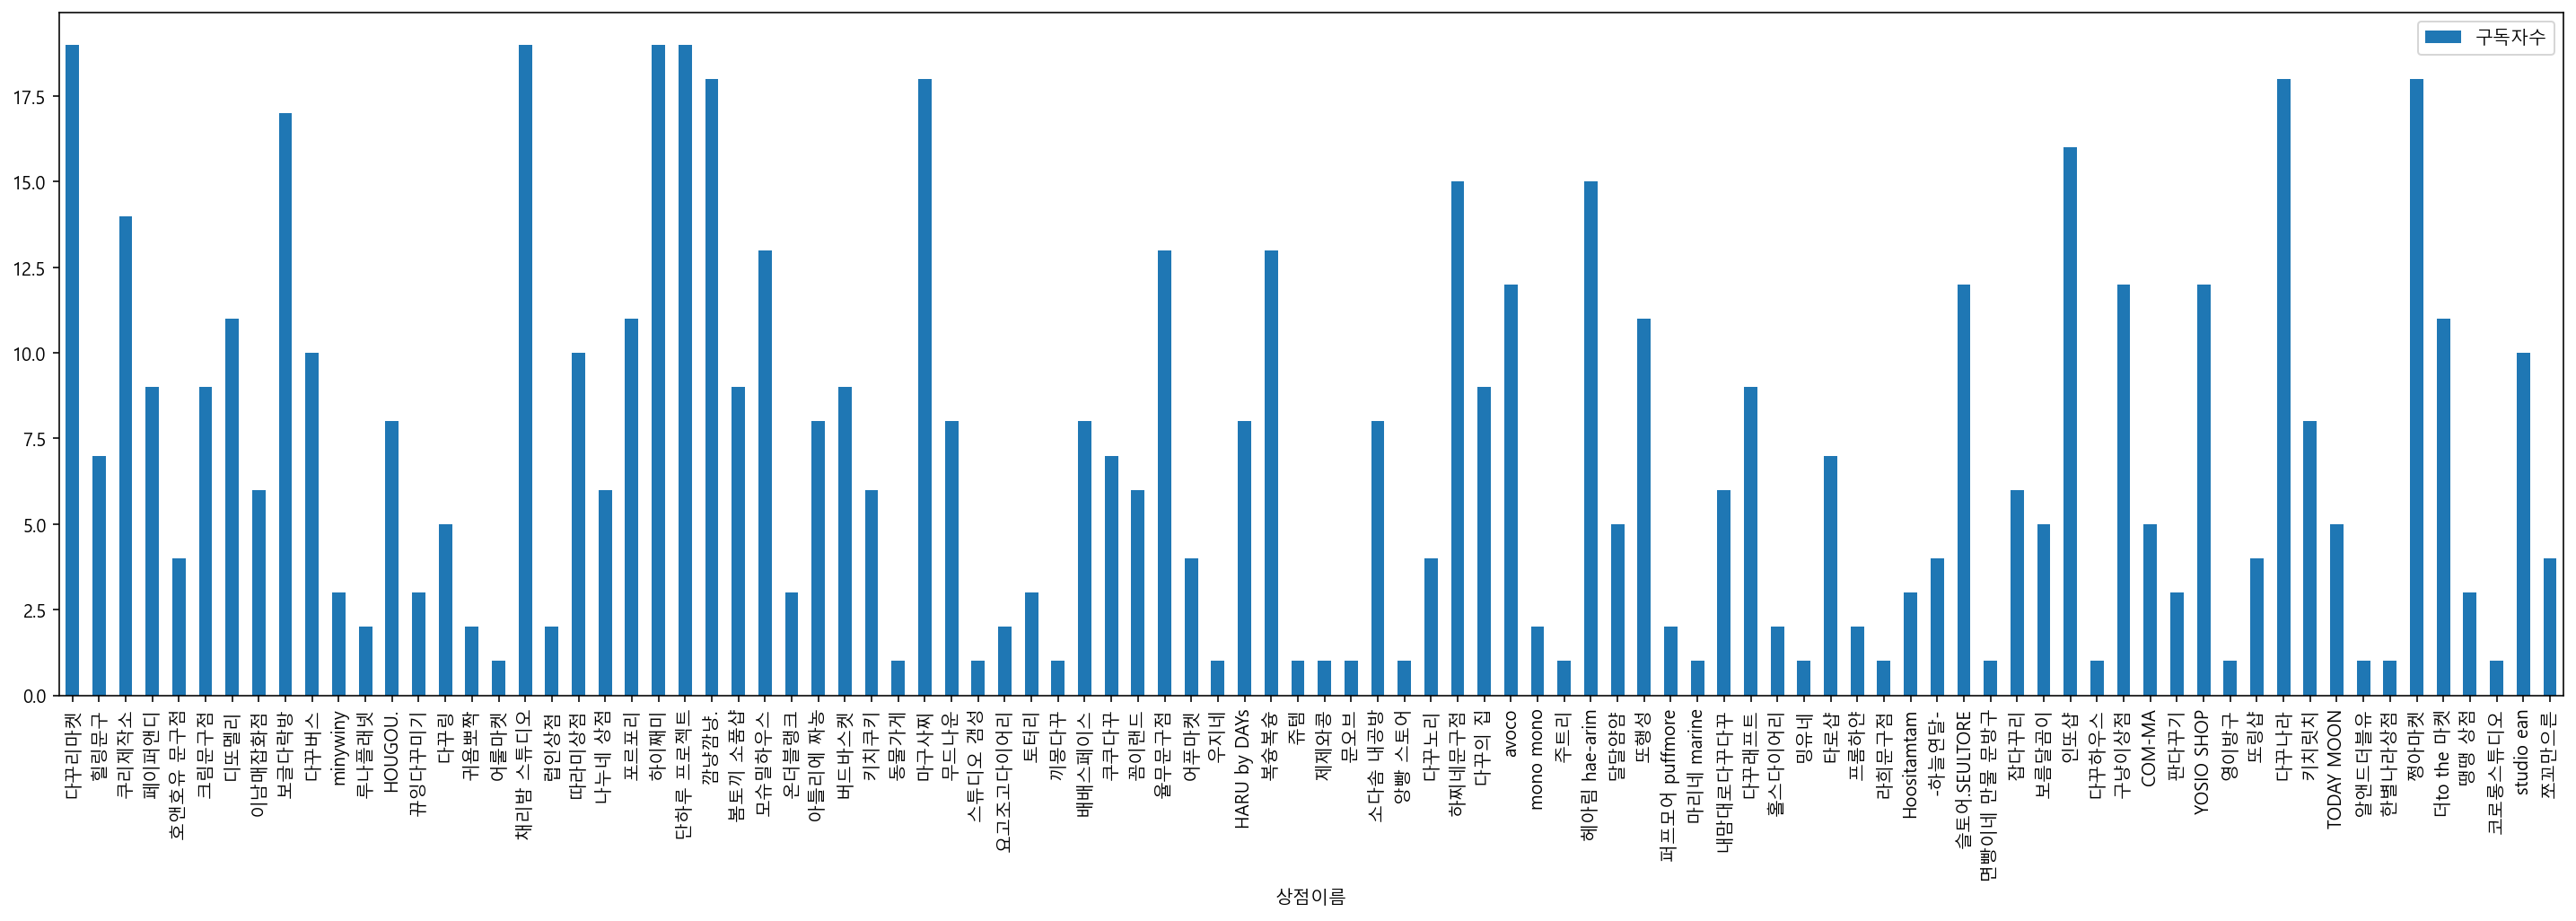

In [86]:
df_sub_twenty.plot.bar(x = "상점이름",figsize=(25,7))

<AxesSubplot:xlabel='상점이름'>

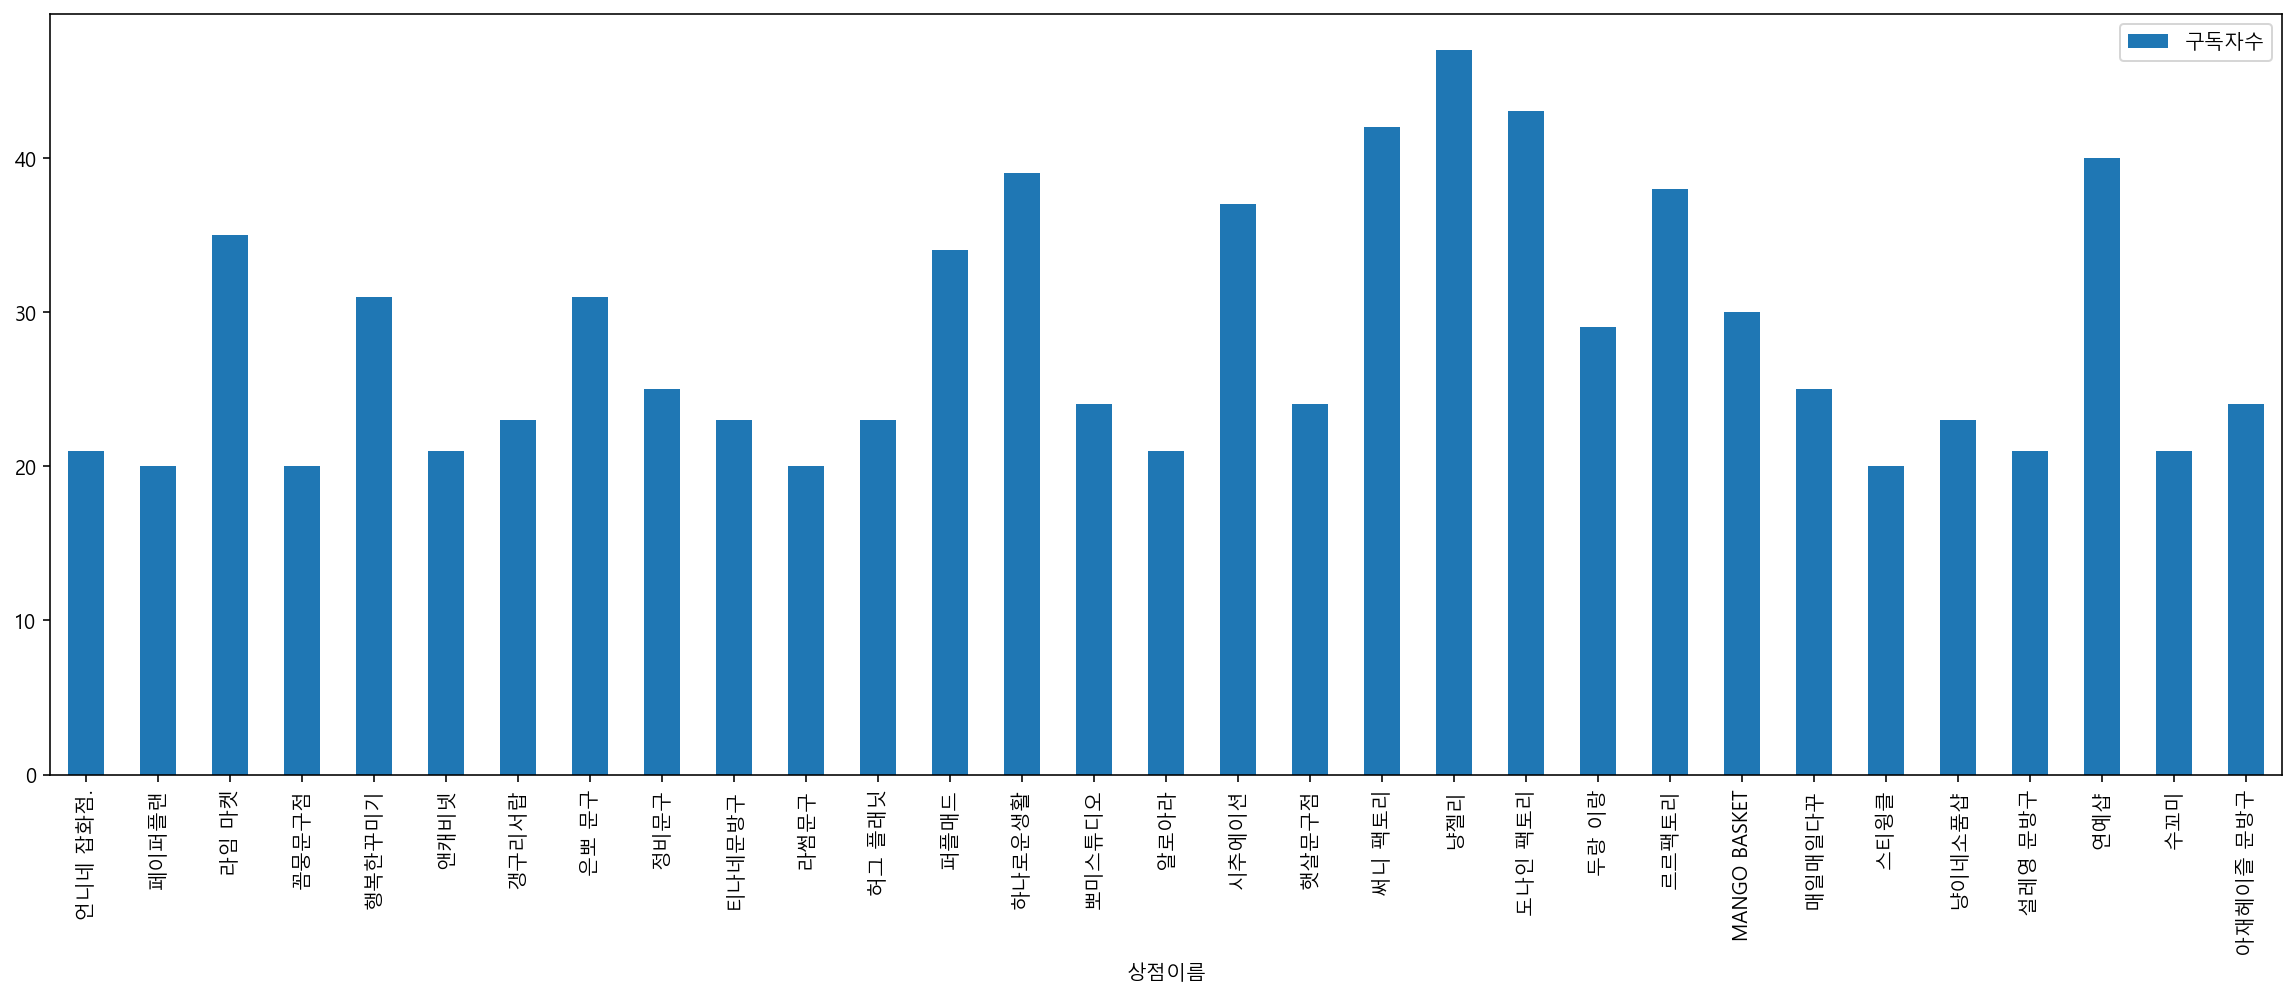

In [95]:
df_sub_fifty.plot.bar(x = "상점이름",figsize=(20,7))

<AxesSubplot:xlabel='상점이름'>

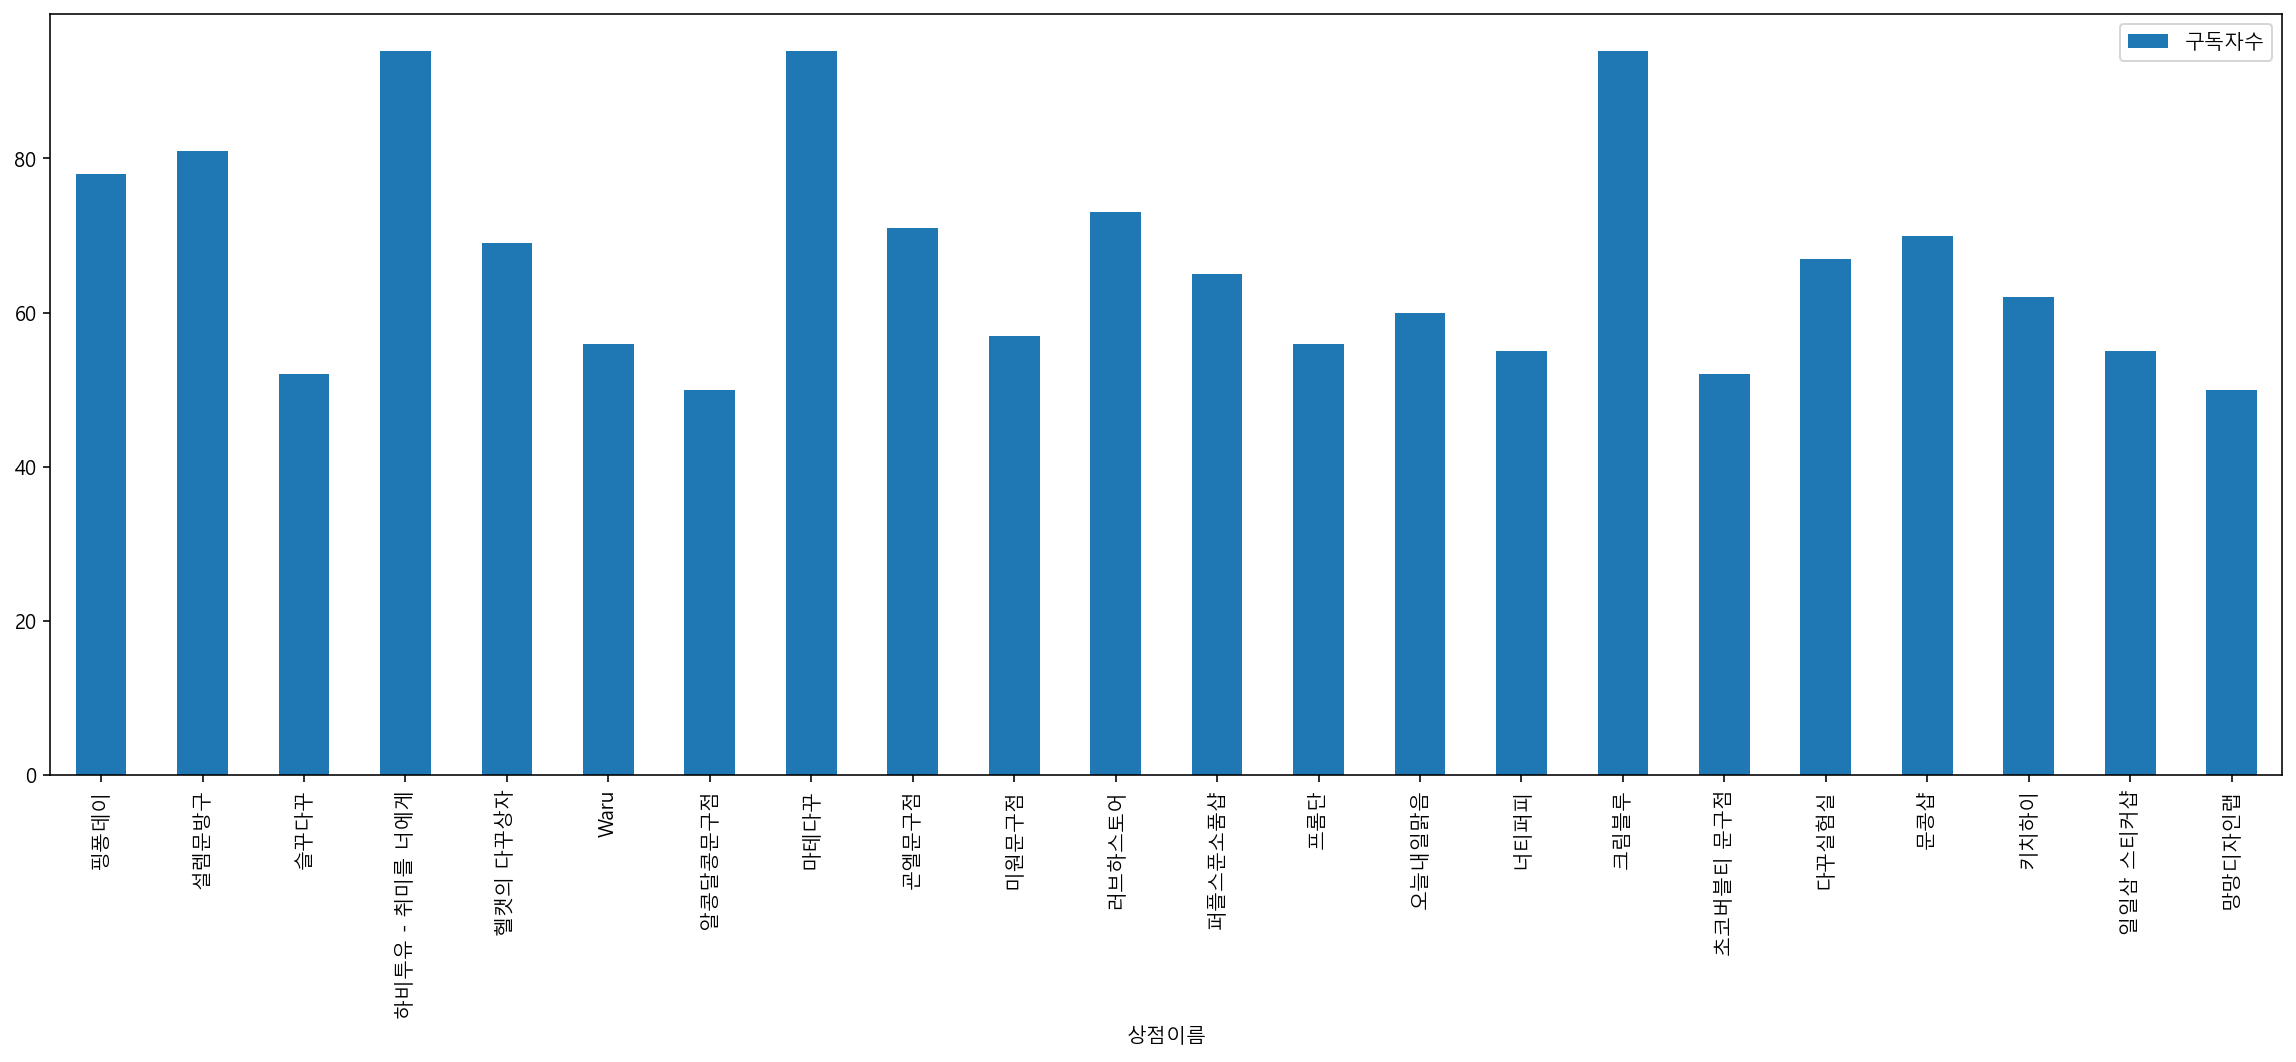

In [94]:
df_sub_fifty_up.plot.bar(x = "상점이름",figsize=(20,7))

<AxesSubplot:xlabel='상점이름'>

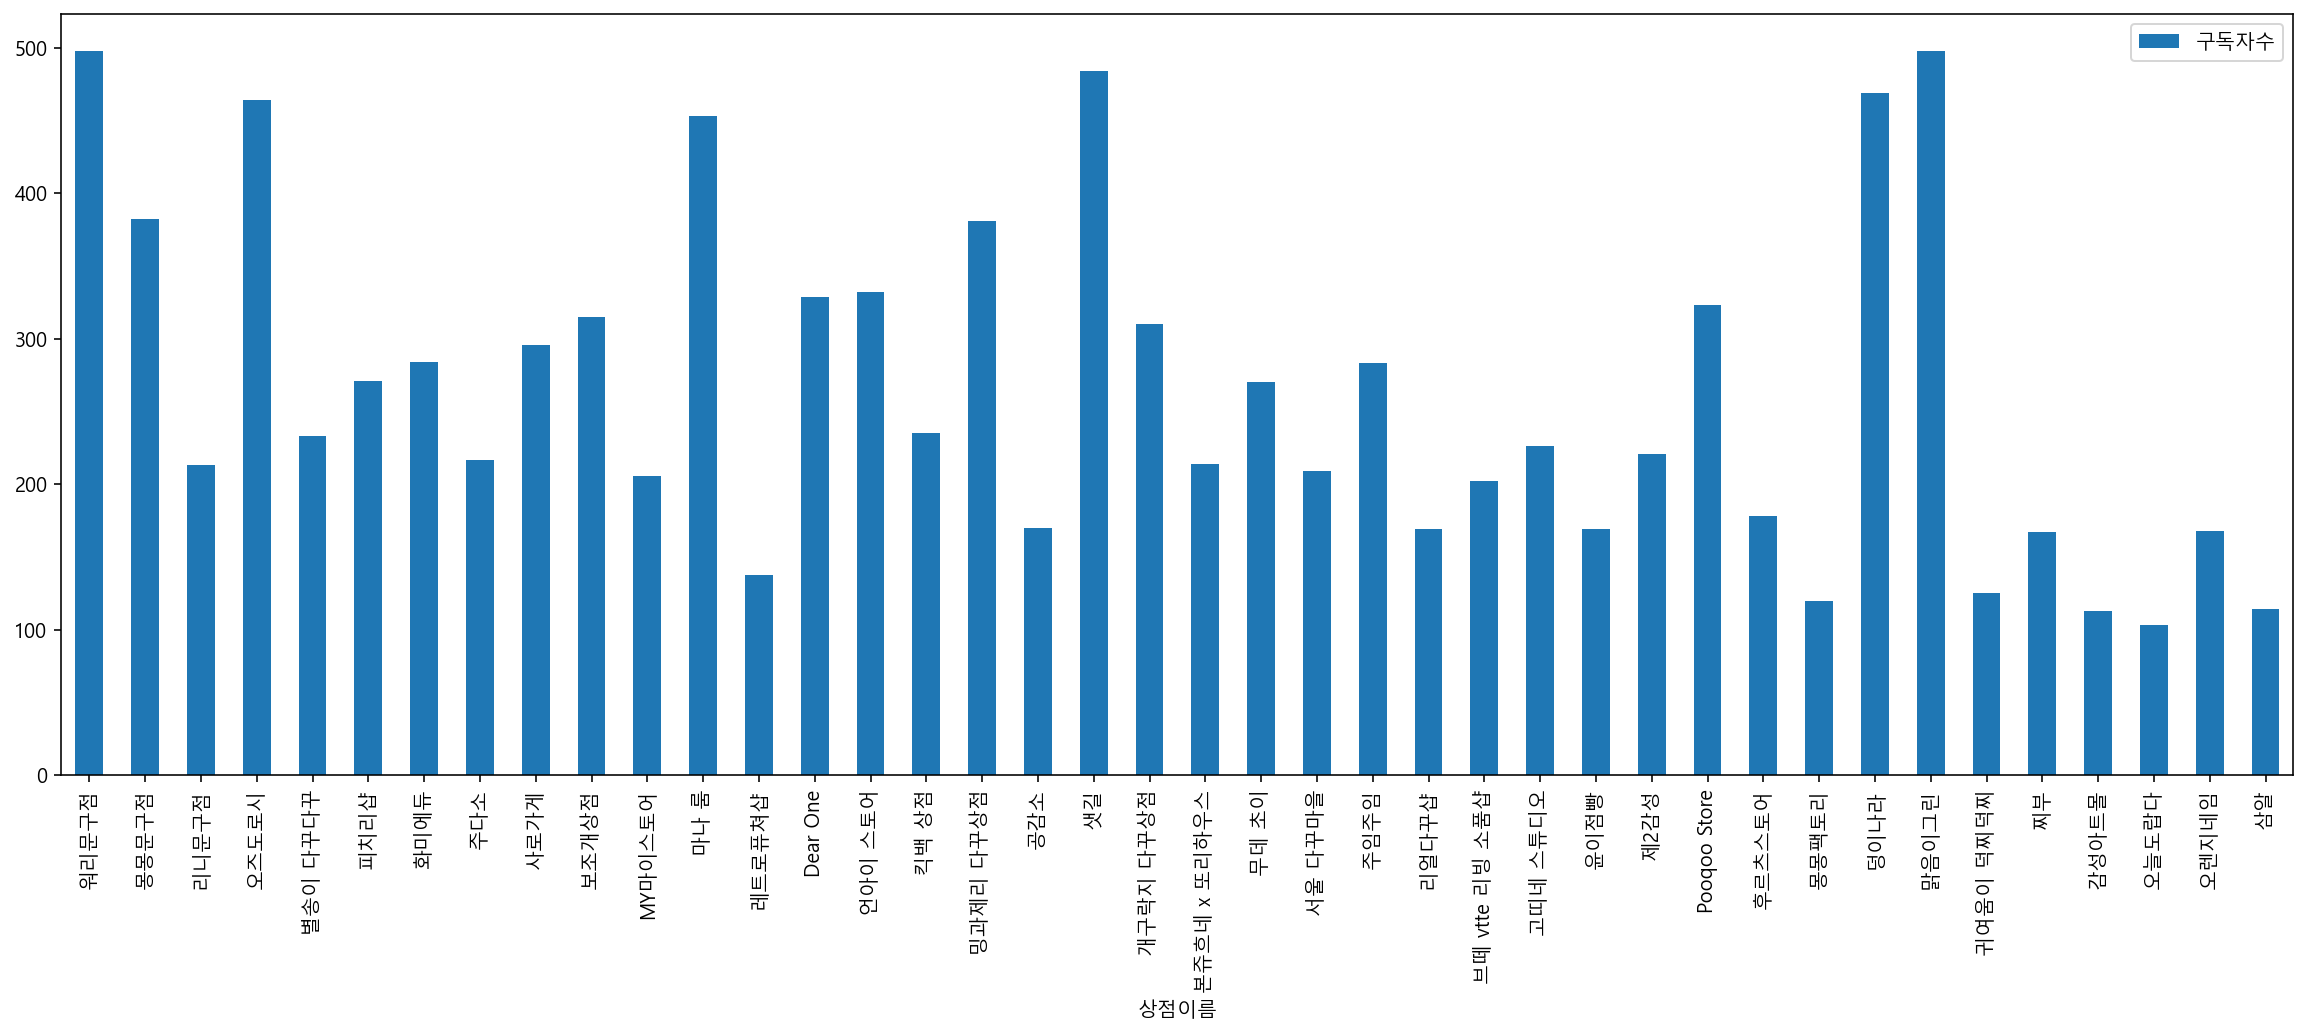

In [97]:
df_sub_hundred.plot.bar(x = "상점이름",figsize=(20,7))

<AxesSubplot:xlabel='상점이름'>

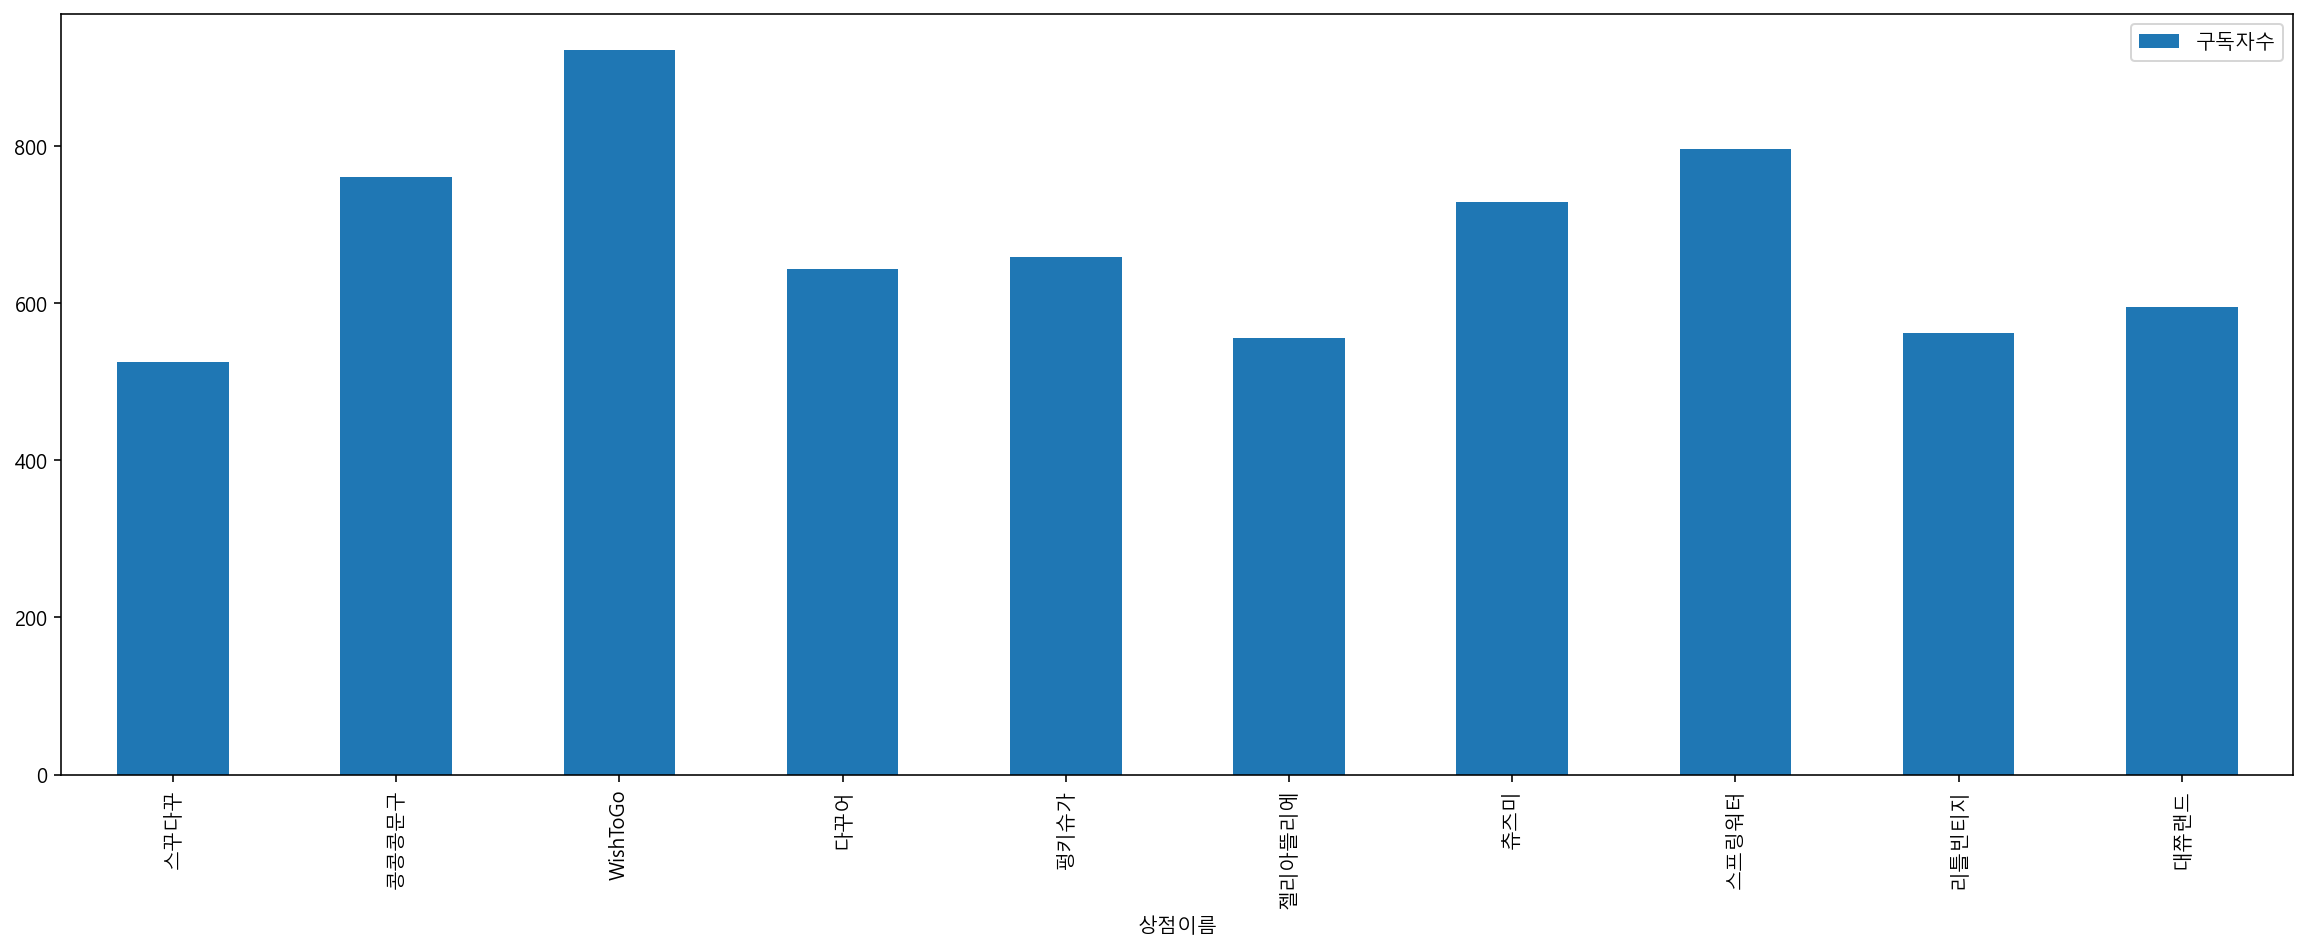

In [98]:
df_sub_five_hundred.plot.bar(x = "상점이름",figsize=(20,7))

<AxesSubplot:xlabel='상점이름'>

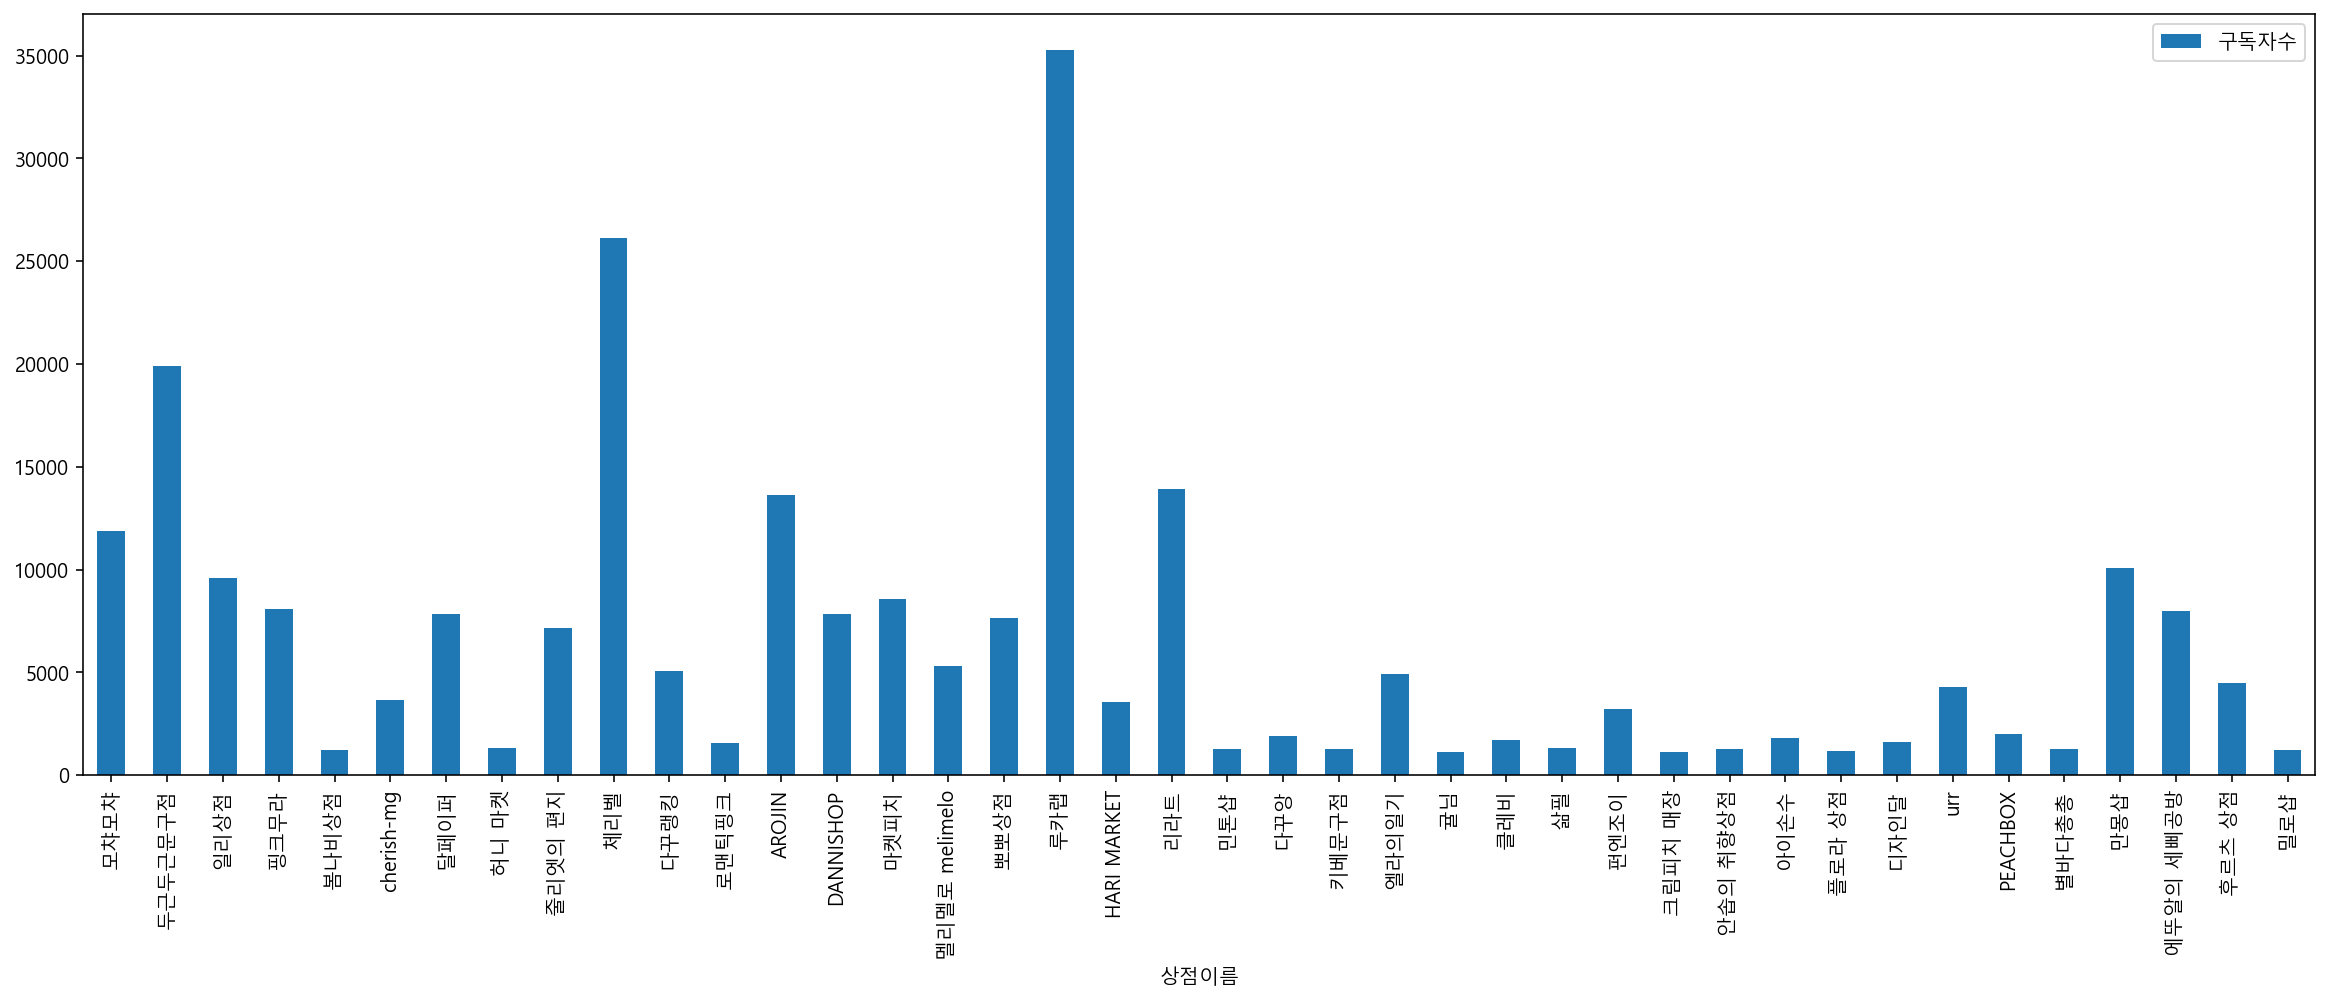

In [105]:
df_sub_thousand.plot.bar(x = "상점이름",figsize=(20,7))

In [106]:
df

,상점이름,구독수,파워유무,상품개수
0,모챠모챠,"스토어찜 11,882",빅파워,"상품개수 1,627"
1,두근두근문구점,"스토어찜 19,918",빅파워,"상품개수 9,079"
2,일리상점,"스토어찜 9,571",빅파워,"상품개수 5,365"
3,핑크무라,"스토어찜 8,108",파워,"상품개수 1,194"
4,봄나비상점,"스토어찜 1,222",파워,상품개수 975
...,...,...,...,...
247,땡땡 상점,스토어찜 3,none,상품개수 1
248,코로롱스튜디오,스토어찜 1,none,상품개수 1
249,아재헤이즐 문방구,스토어찜 24,none,상품개수 1
250,studio ean,스토어찜 10,none,상품개수 1


In [107]:
df_power_count = df[["상점이름","구독수","파워유무"]]
df_power_count

,상점이름,구독수,파워유무
0,모챠모챠,"스토어찜 11,882",빅파워
1,두근두근문구점,"스토어찜 19,918",빅파워
2,일리상점,"스토어찜 9,571",빅파워
3,핑크무라,"스토어찜 8,108",파워
4,봄나비상점,"스토어찜 1,222",파워
...,...,...,...
247,땡땡 상점,스토어찜 3,none
248,코로롱스튜디오,스토어찜 1,none
249,아재헤이즐 문방구,스토어찜 24,none
250,studio ean,스토어찜 10,none


In [108]:
# 파워나 빅파워가 들어간 상점

df_power = df_power_count.loc[df["파워유무"].str.contains("파워")].copy()
df_power.head()

,상점이름,구독수,파워유무
0,모챠모챠,"스토어찜 11,882",빅파워
1,두근두근문구점,"스토어찜 19,918",빅파워
2,일리상점,"스토어찜 9,571",빅파워
3,핑크무라,"스토어찜 8,108",파워
4,봄나비상점,"스토어찜 1,222",파워


In [109]:
# 구독자 수 숫자로 변경
df_power["구독자수"] = df_power["구독수"].apply(parse_num)
df_power

,상점이름,구독수,파워유무,구독자수
0,모챠모챠,"스토어찜 11,882",빅파워,11882
1,두근두근문구점,"스토어찜 19,918",빅파워,19918
2,일리상점,"스토어찜 9,571",빅파워,9571
3,핑크무라,"스토어찜 8,108",파워,8108
4,봄나비상점,"스토어찜 1,222",파워,1222
6,cherish-mg,"스토어찜 3,675",파워,3675
7,달페이퍼,"스토어찜 7,840",빅파워,7840
8,워리문구점,스토어찜 498,파워,498
9,허니 마켓,"스토어찜 1,304",파워,1304
10,줄리엣의 편지,"스토어찜 7,140",빅파워,7140


In [110]:
# 구독수 컬럼 삭제
df_power = df_power.drop("구독수",axis=1)
df_power.head()

,상점이름,파워유무,구독자수
0,모챠모챠,빅파워,11882
1,두근두근문구점,빅파워,19918
2,일리상점,빅파워,9571
3,핑크무라,파워,8108
4,봄나비상점,파워,1222


In [116]:
df_power["구독자수"].min() # 파워나 빅파워가 붙은 값 중에 최소값

498

In [117]:
df_power["구독자수"].max() # 파워나 빅파워가 붙은 값 중에 최댓값

35254

<AxesSubplot:xlabel='상점이름'>

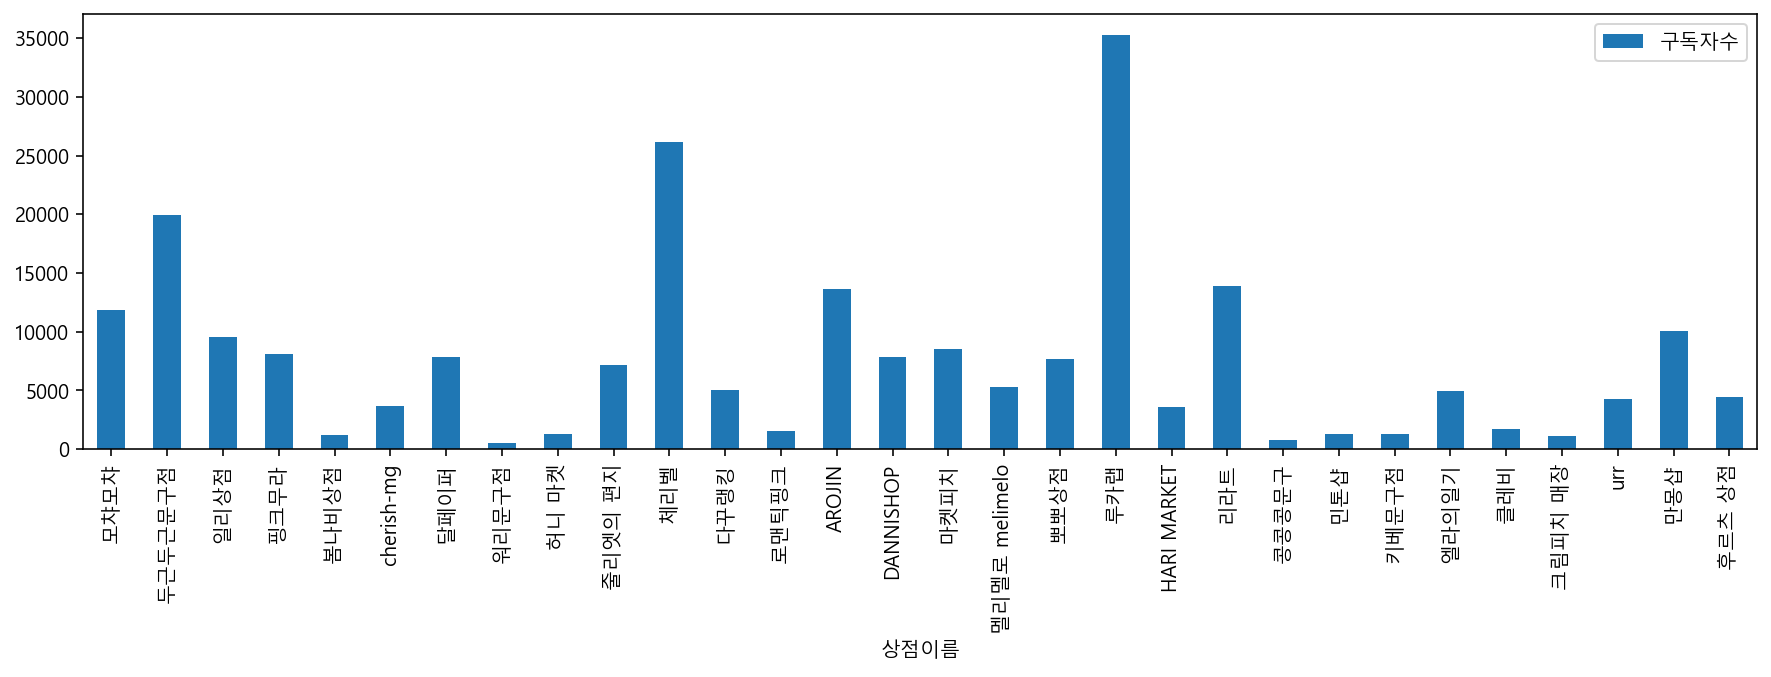

In [111]:
# 파워나 빅파워가 붙은 상점들만 모아서 스토어찜 개수 보기
df_power.plot.bar(x = "상점이름",figsize=(15,4))

In [112]:
df_power.shape

(30, 3)

In [118]:
df.head()

,상점이름,구독수,파워유무,상품개수
0,모챠모챠,"스토어찜 11,882",빅파워,"상품개수 1,627"
1,두근두근문구점,"스토어찜 19,918",빅파워,"상품개수 9,079"
2,일리상점,"스토어찜 9,571",빅파워,"상품개수 5,365"
3,핑크무라,"스토어찜 8,108",파워,"상품개수 1,194"
4,봄나비상점,"스토어찜 1,222",파워,상품개수 975


In [120]:
df_count = df[["상점이름","파워유무","상품개수"]]
df_count

,상점이름,파워유무,상품개수
0,모챠모챠,빅파워,"상품개수 1,627"
1,두근두근문구점,빅파워,"상품개수 9,079"
2,일리상점,빅파워,"상품개수 5,365"
3,핑크무라,파워,"상품개수 1,194"
4,봄나비상점,파워,상품개수 975
...,...,...,...
247,땡땡 상점,none,상품개수 1
248,코로롱스튜디오,none,상품개수 1
249,아재헤이즐 문방구,none,상품개수 1
250,studio ean,none,상품개수 1


In [133]:
df_sub_c = df_count.loc[df["상품개수"].str.contains("상품개수")].copy()
df_sub_c.head()

,상점이름,파워유무,상품개수,상품수
0,모챠모챠,빅파워,"상품개수 1,627",1627
1,두근두근문구점,빅파워,"상품개수 9,079",9079
2,일리상점,빅파워,"상품개수 5,365",5365
3,핑크무라,파워,"상품개수 1,194",1194
4,봄나비상점,파워,상품개수 975,975


In [130]:
# 상품개수 중에서 숫자만 분리하기
def parse_num2(data):
    num = data.split("수")[-1] # 뒤에 있는 숫자 가져오기
    num = num.replace(' ', '') # 공백 없애기
    num = num.replace(',', '') # 컴마 없애기
    # int(year) # 숫자로 변경 

    num = int(num)
    return num
y = parse_num(data)
print(type(y))
y

NameError: name 'data' is not defined

In [134]:
# 상품개수 분리

df_sub_c["상품수"] = df_sub_c["상품개수"].apply(parse_num2)
df_sub_c

,상점이름,파워유무,상품개수,상품수
0,모챠모챠,빅파워,"상품개수 1,627",1627
1,두근두근문구점,빅파워,"상품개수 9,079",9079
2,일리상점,빅파워,"상품개수 5,365",5365
3,핑크무라,파워,"상품개수 1,194",1194
4,봄나비상점,파워,상품개수 975,975
...,...,...,...,...
247,땡땡 상점,none,상품개수 1,1
248,코로롱스튜디오,none,상품개수 1,1
249,아재헤이즐 문방구,none,상품개수 1,1
250,studio ean,none,상품개수 1,1


In [139]:
# 파워나 빅파워가 붙은 스토어의 상품수 알아보기

df_sub_c = df_sub_c.loc[df["파워유무"].str.contains("파워")].copy()
df_sub_c

,상점이름,파워유무,상품개수,상품수
0,모챠모챠,빅파워,"상품개수 1,627",1627
1,두근두근문구점,빅파워,"상품개수 9,079",9079
2,일리상점,빅파워,"상품개수 5,365",5365
3,핑크무라,파워,"상품개수 1,194",1194
4,봄나비상점,파워,상품개수 975,975
6,cherish-mg,파워,상품개수 842,842
7,달페이퍼,빅파워,"상품개수 6,013",6013
8,워리문구점,파워,상품개수 575,575
9,허니 마켓,파워,상품개수 789,789
10,줄리엣의 편지,빅파워,상품개수 427,427


In [137]:
df_sub_c["상품수"].min()

1

In [138]:
df_sub_c["상품수"].max()

9079

# 정리
- (2022.03.29)
- 242개의 스토어에서 30개의 스토어만 파워, 빅파워가 붙어있다.
- 242개에서 237개만 스토어 찜수가 있다.
- 나머지 5개의 상점은 스토어 찜수가 없다.

## 스토어 찜수로 보는 구간별 개수
- 스토어찜 수가 20개 이하는 총 94개로 가장 많은 구간
- 스토어찜 수가 20이상 50미만은 총 31개
- 스토어찜 수가 50이상 100미만은 총 22개
- 스토어찜 수가 100이상 500미만은 총 40개
- 스토어찜 수가 500이상 1000미만은 총 10개
- 스토어찜 수가 1000이상은 총 40개

## 파워유무
- 파워나 빅파워가 붙은 스토어의 스토어 찜수 중에 가장 최소값은 498이며, 최댓값은 35254이다.
- > 파워나 빅파워의 유무는 스토어 찜수로 결정되는 것이 아니다.
- > 상품수에 따라서 결정되는 부분도 아니다.
- 파워나 빅파워가 붙은 상품수 중에 최댓값은 9079개이고, 최솟값은 1개이다.
- 판매건수와 판매금액으로 결정
- 파워, 빅파워, 프리미엄, 플래티넘